In [42]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np

In [43]:
#READ DATA
df=pd.read_csv('adult.csv')

In [44]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [46]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [47]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [48]:
df.shape

(32561, 15)

In [49]:
# EDA 

# 1.Handle '?' in workclass
# 2.Handle '?' in occupation
# 3.Drop eductaion.num no use
# 4.Convert target variable into 0 and 1


In [50]:
df1=df.copy()

In [51]:
df.drop(['education.num', 'fnlwgt', 'capital.gain', 'capital.loss','race'],axis=1, inplace=True)

In [52]:
df.head()

,age,workclass,education,marital.status,occupation,relationship,sex,hours.per.week,native.country,income
0,90,?,HS-grad,Widowed,?,Not-in-family,Female,40,United-States,<=50K
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,Female,18,United-States,<=50K
2,66,?,Some-college,Widowed,?,Unmarried,Female,40,United-States,<=50K
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,Female,40,United-States,<=50K
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,Female,40,United-States,<=50K


In [53]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [54]:
df.isnull().sum()

age               0
workclass         0
education         0
marital.status    0
occupation        0
relationship      0
sex               0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [55]:
# REPLACING ? WITH UNKNOWN 
df['workclass']=df['workclass'].str.replace('?',"Unknown")

In [56]:
df['workclass'].unique()

array(['Unknown', 'Private', 'State-gov', 'Federal-gov',
       'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay',
       'Never-worked'], dtype=object)

In [57]:
# REPLACING ? WITH UNKNOWN
df['occupation']=df['occupation'].str.replace('?',"Unknown")

In [58]:
# REPLACING ? WITH UNKNOWN
df['native.country']=df['native.country'].str.replace('?',"Unknown")

In [59]:
df.describe()

,age,hours.per.week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


<Axes: xlabel='income', ylabel='hours.per.week'>

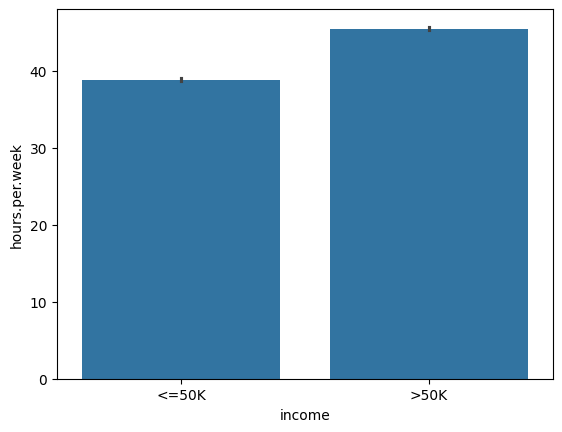

In [60]:
# CHECKING THE INCOME VS HOURS PER WEEK DISTRIBUTION

import seaborn as sns
sns.barplot(x='income',y='hours.per.week',data=df)

In [61]:
df['hours.per.week'].unique()

array([40, 18, 45, 20, 60, 35, 55, 76, 50, 42, 25, 32, 90, 48, 15, 70, 52,
       72, 39,  6, 65, 12, 80, 67, 99, 30, 75, 26, 36, 10, 84, 38, 62, 44,
        8, 28, 59,  5, 24, 57, 34, 37, 46, 56, 41, 98, 43, 63,  1, 47, 68,
       54,  2, 16,  9,  3,  4, 33, 23, 22, 64, 51, 19, 58, 53, 96, 66, 21,
        7, 13, 27, 11, 14, 77, 31, 78, 49, 17, 85, 87, 88, 73, 89, 97, 94,
       29, 82, 86, 91, 81, 92, 61, 74, 95])

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [63]:
#Removed the first index
df.drop(df.iloc[:,:0],axis=1,inplace=True)
df.head()

,age,workclass,education,marital.status,occupation,relationship,sex,hours.per.week,native.country,income
0,90,Unknown,HS-grad,Widowed,Unknown,Not-in-family,Female,40,United-States,<=50K
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,Female,18,United-States,<=50K
2,66,Unknown,Some-college,Widowed,Unknown,Unmarried,Female,40,United-States,<=50K
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,Female,40,United-States,<=50K
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,Female,40,United-States,<=50K


In [64]:
# CLASSIFYING THE EDUCATION COLUMN INTO GROUPS
Education_new=   { 
    '7th-8th': 'Schooling',
    '10th': 'Schooling',
    '11th': 'Schooling',
    '1st-4th': 'Schooling',
    '5th-6th': 'Schooling',
    '12th': 'Schooling',
    '9th': 'Schooling',
    'Preschool': 'Schooling',
    'HS-grad': 'Bachelor',
    'Some-college': 'Bachelor',
    'Bachelors': 'Bachelor',
    'Masters': 'Masters',
    'Doctorate': 'Doctorate/Professional',
    'Prof-school': 'Doctorate/Professional',
    'Assoc-acdm': 'Doctorate/Professional',
    'Assoc-voc': 'Doctorate/Professional'
}
df['education']=df['education'].map(Education_new)
df['education']


0                      Bachelor
1                      Bachelor
2                      Bachelor
3                     Schooling
4                      Bachelor
                  ...          
32556                  Bachelor
32557    Doctorate/Professional
32558                  Bachelor
32559                  Bachelor
32560                  Bachelor
Name: education, Length: 32561, dtype: object

In [65]:
df.corr(numeric_only=True)

,age,hours.per.week
age,1.000000,0.068756
hours.per.week,0.068756,1.000000


In [66]:
# ENCODING BEFORE TRAINING THE DATA

#Ordinal --> Education 
#nominal --> workclass,marital.status,occupation,relationship,sex,native.country
#label Encoding --> income

In [67]:
#SPLIT THE X AND Y VARIABLE

X=df.iloc[:,:-1]
y=df['income']

In [68]:
X.head()

,age,workclass,education,marital.status,occupation,relationship,sex,hours.per.week,native.country
0,90,Unknown,Bachelor,Widowed,Unknown,Not-in-family,Female,40,United-States
1,82,Private,Bachelor,Widowed,Exec-managerial,Not-in-family,Female,18,United-States
2,66,Unknown,Bachelor,Widowed,Unknown,Unmarried,Female,40,United-States
3,54,Private,Schooling,Divorced,Machine-op-inspct,Unmarried,Female,40,United-States
4,41,Private,Bachelor,Separated,Prof-specialty,Own-child,Female,40,United-States


In [69]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
#Split the ordinal and nominal variable

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

transformer=ColumnTransformer(
    transformers=
    [
    ('StandardScaling',StandardScaler(),['age','hours.per.week']),
    ('Ordinal',OrdinalEncoder(categories=[['Schooling','Bachelor','Masters','Doctorate/Professional']]),['education']),
    ('Nominal',OneHotEncoder(sparse_output=False,drop='first'),
                             ['workclass','marital.status','occupation','relationship','sex','native.country'])],
    remainder='passthrough'

)

In [71]:

X_train=transformer.fit_transform(X_train)
X_test=transformer.transform(X_test)

In [72]:
# Label encoder in Target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)


In [73]:
y_train

array([0, 0, 0, ..., 1, 1, 0], shape=(26048,))

In [74]:
X_train.shape

(26048, 78)

In [75]:
y_train.shape

(26048,)

In [76]:
X_test.shape

(6513, 78)

In [77]:
# Train the model USING LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
classifier.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [78]:
# Making Prediction

y_pred = classifier.predict(X_test)

In [79]:
# CHECKING THE Accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8246583755565792